In [1]:
import globals
import numpy as np
import matplotlib.pyplot as plt
import os
import globals as gl
import PcmPy as pcm

plt.style.use('default')

In [2]:
G = np.load(os.path.join(gl.baseDir, gl.rsaDir, 'G_obs.npy'))
G_avg = G.mean(axis=0)
N = G.shape[0]
D_avg = pcm.G_to_dist(G_avg)

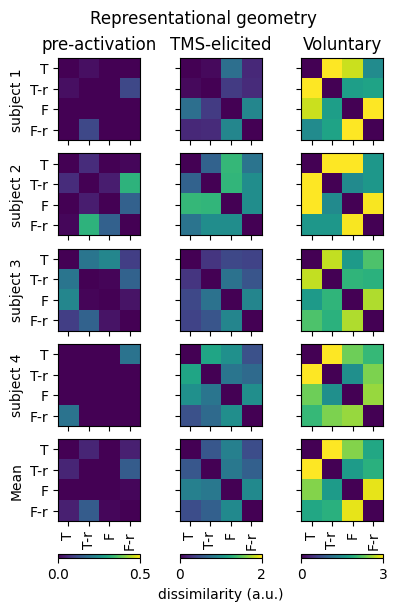

In [3]:
fig, axs = plt.subplots(N + 1, 3, sharex=True, sharey=True, constrained_layout=True, figsize=(4, 6))

condition = ['pre-activation', 'TMS-elicited', 'Voluntary']
vlim = [(0, .5), (0, 2), (0, 3)]

for n in range(N):
    D = pcm.G_to_dist(G[n]) # / np.trace(G[n], axis1=1, axis2=2)[:, None, None])
    for c, cond in enumerate(condition):
        ax = axs[n, c]
        ax.imshow(D[c], vmin=vlim[c][0], vmax=vlim[c][1])
        if c==0:
            ax.set_ylabel(f'subject {n+1}')
            ax.set_yticks(np.arange(4))
            ax.set_yticklabels(['T', 'T-r', 'F', 'F-r'])
        if n==0:
            ax.set_title(cond)

for c, cond in enumerate(condition):
    ax = axs[-1, c]
    ax.imshow(D_avg[c], vmin=vlim[c][0], vmax=vlim[c][1])
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(['T', 'T-r', 'F', 'F-r'], rotation=90)
    if c==0:
        ax.set_ylabel('Mean')

for i, ax in enumerate(axs[-1]):
    cax = ax.get_images()[0]
    cbar = fig.colorbar(cax, ax=ax, orientation='horizontal', fraction=.05)
    cbar.set_ticks(np.array(vlim[i]))
    cbar.set_label('dissimilarity (a.u.)') if i == 1 else None

fig.suptitle('Representational geometry')

plt.show()

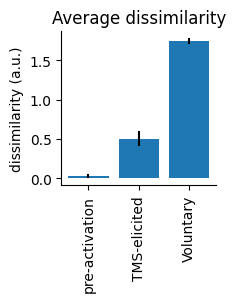

In [36]:
#C = G.shape[1]
D_s_avg = np.zeros(3)
D_s_err = np.zeros(3)
for c in range(C):
    D_s_avg[c] = pcm.G_to_dist(G[:, c]).mean()
    D_s_err[c] = pcm.G_to_dist(G[:, c]).mean(axis=(1, 2)).std(axis=0) / np.sqrt(N)

fig, ax = plt.subplots(figsize=(2, 2))

ax.bar(condition, D_s_avg, yerr=D_s_err)
ax.set_ylabel('dissimilarity (a.u.)')
ax.set_title('Average dissimilarity')
ax.set_xticks(condition)
ax.set_xticklabels(condition, rotation=90)
#ax.set_yscale('symlog', linthresh=1)
ax.spines[['top', 'right']].set_visible(False)

plt.show()